# 1 Business Understanding

### 1.1 Background
Malaria and typhoid are two of the most common diseases in Ghana, especially in rural and low-income areas. Both cause fever, headache, and body weakness, and they affect many people every year. Because the symptoms are so similar, health workers often find it hard to know which disease a patient has without lab tests. However, many clinics and health centers in rural areas do not have the tools, supplies, or trained staff to run these tests.

As a result, patients are usually treated based on symptoms alone. This leads to wrong treatments, like giving malaria medicine to someone who actually has typhoid, or giving antibiotics to someone with malaria. Wrong treatment can make patients sicker, increase healthcare costs, and lead to drug resistance, which makes future treatments less effective.

### 1.2 Problem Statement
The main problem is that malaria and typhoid are hard to tell apart based on symptoms, and many health facilities lack access to reliable lab tests. This results in misdiagnosis, incorrect treatment, and growing drug resistance. The situation is worse in rural areas where healthcare resources are limited.

### 1.3 Business Goal
The goal is to improve the accuracy of diagnosing malaria and typhoid in primary healthcare settings, especially in rural areas of Ghana. By doing this, we can ensure patients get the right treatment faster, reduce the misuse of drugs, and lower the risk of drug resistance.

### 1.4 Project Objective
This project aims to develop a simple, smart tool using machine learning that can help health workers tell the difference between malaria and typhoid based only on a patient’s symptoms and basic information (like age, location, and fever duration). The tool will work even in clinics without lab testing and can be used on mobile phones or simple computers.

### 1.5 Success Criteria
The project will be considered successful if:

#### Technical Success
* The tool correctly identifies whether a patient has malaria or typhoid at least 85% of the time.

#### Business Success
* It reduces the number of wrong treatments given.
* It helps health centers make faster and more accurate decisions without needing lab tests.








# 2. Data Understanding 

In [1]:
# importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#import dataset
df = pd.read_csv('../dataset/malaria_typhoid_data.csv')
df.head(20)

,Temperature,Headache,Fatigue,Loss_of_Appetite,Abdominal_Pain,Diarrhea,Anemia,Nausea,Vomiting,Chills,Sweating,Joint_Pain,Cough,Weakness,Weight_Loss,Condition
0,38.0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,Malaria
1,37.4,1,0,0,0,0,1,1,0,1,1,1,0,0,0,Malaria
2,38.1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,Malaria
3,39.0,0,1,0,0,1,1,0,0,0,1,1,1,1,1,Both
4,37.3,0,0,1,0,1,1,0,0,1,0,0,1,0,0,Both
5,37.3,1,1,1,0,1,0,0,1,1,0,0,0,1,0,Malaria
6,39.1,1,0,0,1,1,1,0,1,0,0,0,0,1,0,Both
7,38.3,0,0,0,1,0,1,1,0,1,0,0,1,1,0,Typhoid
8,37.0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,Malaria
9,38.0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,Typhoid


In [3]:
df.shape

(10000, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temperature       10000 non-null  float64
 1   Headache          10000 non-null  int64  
 2   Fatigue           10000 non-null  int64  
 3   Loss_of_Appetite  10000 non-null  int64  
 4   Abdominal_Pain    10000 non-null  int64  
 5   Diarrhea          10000 non-null  int64  
 6   Anemia            10000 non-null  int64  
 7   Nausea            10000 non-null  int64  
 8   Vomiting          10000 non-null  int64  
 9   Chills            10000 non-null  int64  
 10  Sweating          10000 non-null  int64  
 11  Joint_Pain        10000 non-null  int64  
 12  Cough             10000 non-null  int64  
 13  Weakness          10000 non-null  int64  
 14  Weight_Loss       10000 non-null  int64  
 15  Condition         10000 non-null  object 
dtypes: float64(1), int64(14), object(1)
memor

In [5]:
df.describe()

,Temperature,Headache,Fatigue,Loss_of_Appetite,Abdominal_Pain,Diarrhea,Anemia,Nausea,Vomiting,Chills,Sweating,Joint_Pain,Cough,Weakness,Weight_Loss
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,37.497830,0.508200,0.492000,0.491300,0.511000,0.508500,0.493800,0.499700,0.503100,0.507300,0.503200,0.498900,0.491900,0.496500,0.503100
std,1.004104,0.499958,0.499961,0.499949,0.499904,0.499953,0.499987,0.500025,0.500015,0.499972,0.500015,0.500024,0.499959,0.500013,0.500015
min,33.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.500000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,38.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,41.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#missing values
df.isnull().sum()
df.isnull().sum().sum()

np.int64(0)

In [7]:
# checking for duplicates
print("Duplicates:",df.duplicated().sum())

Duplicates: 43


### Insights from Data Assessment and Quality Checks

#### 1. Dataset Size

* Rows: 10,000

* Columns: 16

#### 2. Feature Types

* 1 float64 feature → Temperature (continuous, numeric)

* 14 int64 features → symptoms (mostly binary: 0 = No, 1 = Yes)

* 1 object feature → Condition (target variable, categorical)

Predictors are all numeric; only target is categorical → good for ML models.

#### 3. Data Completeness

* No missing values (10,000 non-null in all columns).

* No NaNs detected, but best to confirm with df.isnull().sum().sum().

#### 4. Feature Distribution (from df.describe())

#####  Temperature:

* Range: 33.6°C – 41.4°C

* Mean: 37.5°C, Std: ~1.0

* Typical human body temp is 36.5–37.5°C → values above 38°C indicate fever.

#####  Symptoms (binary features):

* Mean values are ~0.49–0.51 → symptoms are almost evenly distributed (≈50% of patients report each symptom).

* 25%, 50%, 75% quantiles → confirm binary encoding (0 or 1).

Key Features for Diagnosis

* Malaria indicators: High fever, chills, sweating, anemia, joint pain.

* Typhoid indicators: Abdominal pain, diarrhea, vomiting, weight loss, weakness.

Condition column = target (disease label).

Condition
Malaria    4033
Both       3054
Typhoid    2913
Name: count, dtype: int64


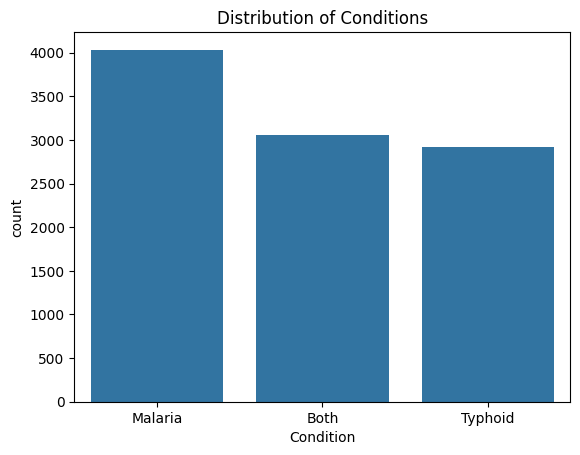

In [8]:
#class distribution
print(df['Condition'].value_counts())
sns.countplot(x='Condition', data=df)
plt.title("Distribution of Conditions")
plt.show()

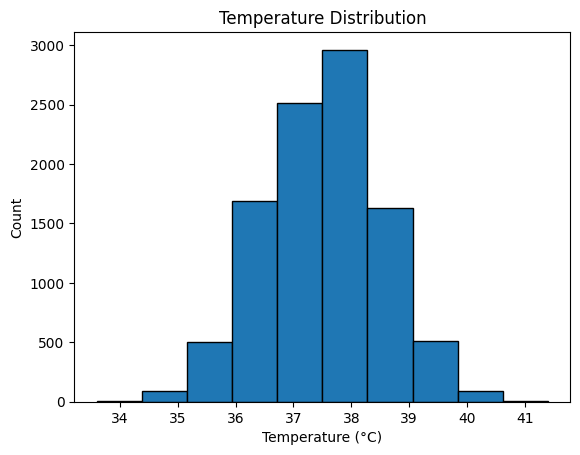

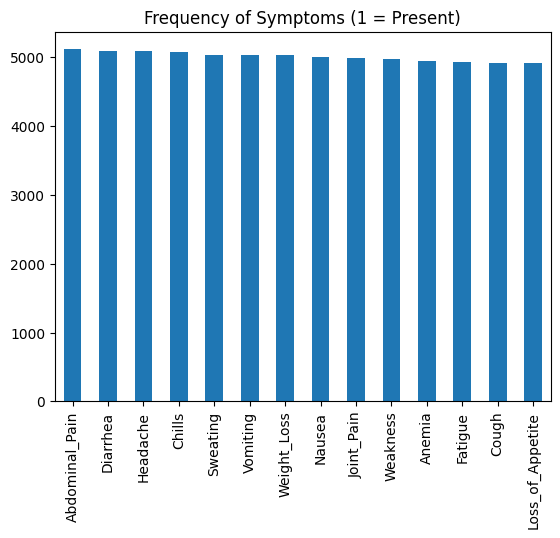

In [9]:
# Numerical variable: Temperature
plt.hist(df['Temperature'], bins=10, edgecolor="black")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.title("Temperature Distribution")
plt.show()

# Binary symptoms: count of 1s and 0s
symptoms = df.drop(columns=['Temperature','Condition'])
symptoms.sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Frequency of Symptoms (1 = Present)")
plt.show()


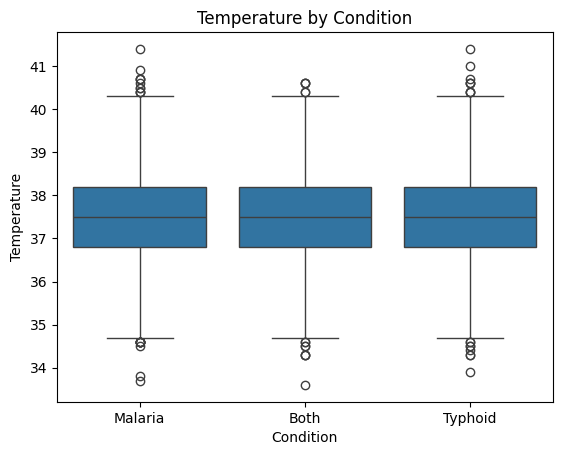

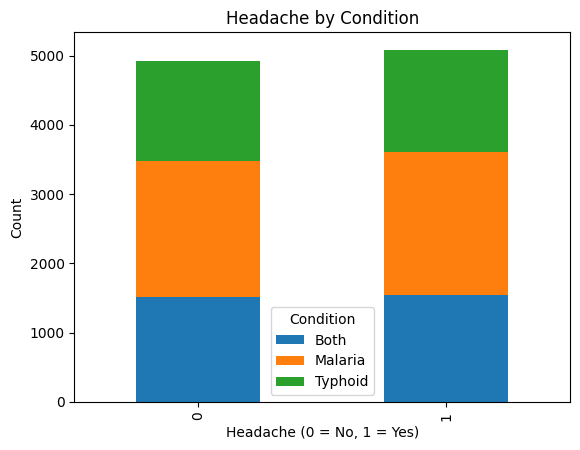

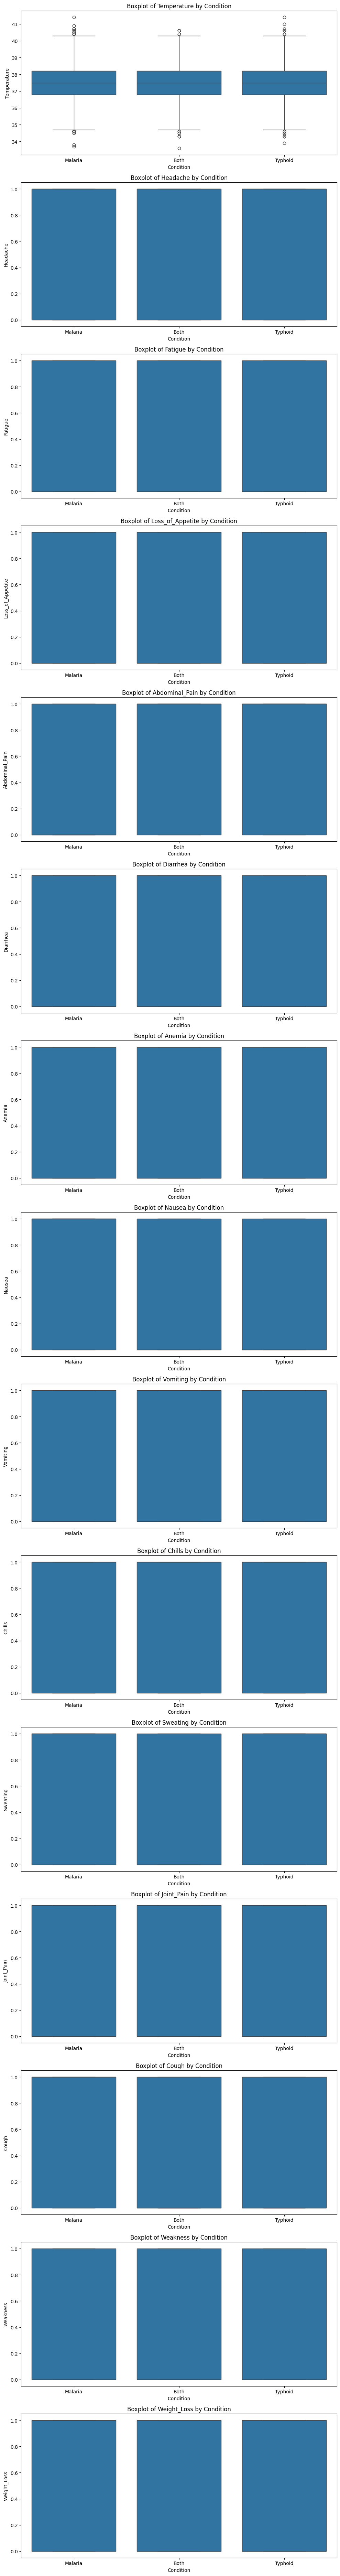

In [15]:
# Temperature vs Condition
sns.boxplot(x="Condition", y="Temperature", data=df)
plt.title("Temperature by Condition")
plt.show()

# Example: Headache vs Condition
pd.crosstab(df['Headache'], df['Condition']).plot(kind="bar", stacked=True)
plt.title("Headache by Condition")
plt.xlabel("Headache (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Box plots for all numerical features by Condition
numerical_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(10, 5 * len(numerical_cols)))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(x='Condition', y=col, data=df)
    plt.title(f'Boxplot of {col} by Condition')
    plt.tight_layout()
plt.show()


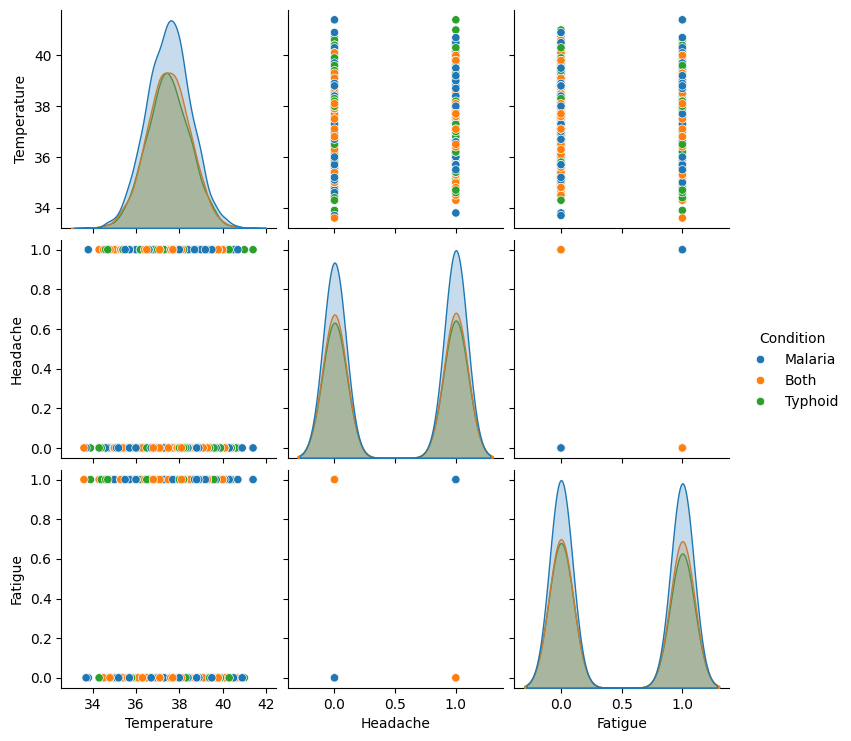

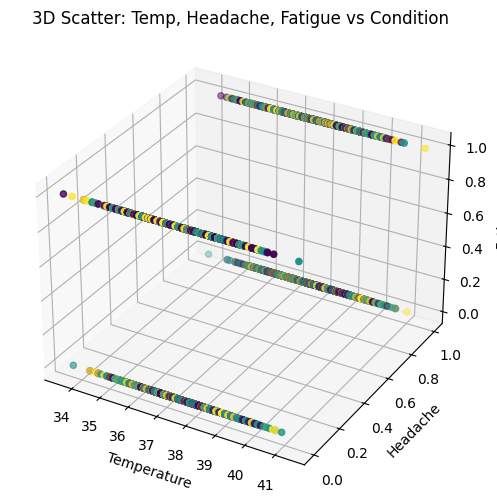

In [11]:
# Pairplot: Temperature + few symptoms vs Condition
sns.pairplot(df[['Temperature','Headache','Fatigue','Condition']], hue="Condition")
plt.show()

# 3D scatter (Temperature, Headache, Fatigue vs Condition)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Temperature'], df['Headache'], df['Fatigue'],
           c=df['Condition'].astype('category').cat.codes, cmap='viridis')

ax.set_xlabel('Temperature')
ax.set_ylabel('Headache')
ax.set_zlabel('Fatigue')
plt.title("3D Scatter: Temp, Headache, Fatigue vs Condition")
plt.show()
